# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


# UCB

In [3]:
N, d  = dataset.shape

ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d #sum of rewards till n round
total_reward = 0

for n in range(N): #each observation
    ad = 0
    max_upper_bound = 0
    
    for i in range(d): #each ads
        if(numbers_of_selections[i]>0): #if ad is selected atleast once
            avg_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = (1.5 * np.log(n + 1) / numbers_of_selections[i])**0.5 #formula
            upper_bound = avg_reward + delta_i #formula
        else: # if ad not selected
            upper_bound = 1e400
            
        
        if(upper_bound>max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
        
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n][ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward += reward

# Visualize Results

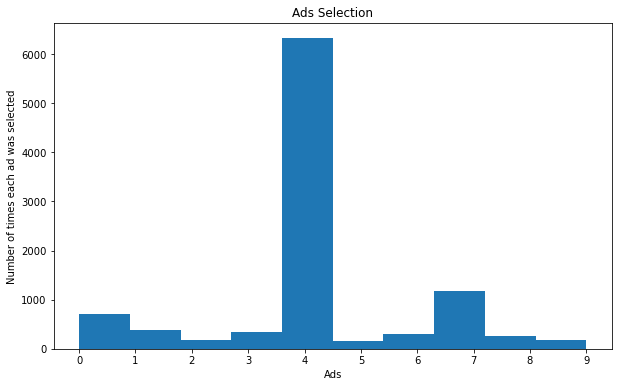

In [4]:
plt.figure(figsize=(10,6))
plt.hist(ads_selected)
plt.title('Ads Selection')
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.xticks(list(range(d)))
plt.show();